# Numerical differentiation and integration
## Junior mentor
Julia Lienert

## Objectives
1. Repitition of SciPy
2. Learn about numerical differentiation and its usage in SciPy
2. Learn about numerical integration and its usage in SciPy
3. Transform our new knowledge to real physics examples (exercise)

## Repitition: SciPy
SciPy is a collection of various helpful Python packages, such as NumPy, Matplotlib, and Pandas.
It therefore assembles useful mathematical algorithms and convenient functions. Additionally, tools for data manipulation and visualization are included.

The packages are included via:

In [2]:
# include useful packages (the last line is needed to show plots directly in Jupyter Notebook)
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Numerical differentiation
### Mathematical background
Sometimes, it is not possible to calculate the derivative of a function analytically. This is the case when we have no knowledge of the function itself and only have access to some data points or if the analytic derivative simply does not exist. Then, the derivative at a given point needs to be calculated numerically. A descriptive explanation can be found [here](https://www.youtube.com/watch?v=zM2wim4JZd0).

A function at the point $i$ is described by $x_i$ and $f_i = f(x_i)$. The neighbouring points are $i-1$ (to the left), given by $(x_{i-1},f_{i-1})$, and $i+1$ (to the right), given by $(x_{i+1},f_{i+1})$. The function at each of those points can be approximated by the respective Taylor series.

\begin{align}
    f_{i-1} &= f_i - f'_i \Delta x + f''_i \frac{\Delta x^2}{2} - f'''_i \frac{\Delta x^3}{6} + O(\Delta x^4), \quad \Delta x = x_i - x_{i-1} \\
    f_{i+1} &= f_i + f'_i \Delta x + f''_i \frac{\Delta x^2}{2} + f'''_i \frac{\Delta x^3}{6} + O(\Delta x^4), \quad \Delta x = x_{i+1} - x_i
\end{align}

Note that the Taylor series of a function at the point $i-1$ is in general defined using $\Delta x = x_{i-1} - x_i$. Since we want to use $\Delta x = x_i - x_{i-1}$ here, the sign of the odd terms in the Taylor series changes. Also, keep in mind that the two $\Delta x$ used above are not the same!


By solving the two equations above for $f'_i$, we are able to derive two similar formulas for the derivative at the point $i$. This gives us the so-called backward derivative when using the formula for $f_{i-1}$,

$$ f'_i = \frac{f_i - f_{i-1}}{\Delta x} + f''_i \frac{\Delta x}{2} - f'''_i \frac{\Delta x^2}{6} + O(\Delta x^3), $$

and the forward derivative when using the formula for $f_{i+1}$,

$$ f'_i = \frac{f_{i+1} - f_i}{\Delta x} - f''_i \frac{\Delta x}{2} - f'''_i \frac{\Delta x^2}{6} + O(\Delta x^3). $$

As we do not know the values for $f''_i$ and $f'''_i$, these terms are neglected and both forward and backward derivative therefore have an error of $O(\Delta x)$.

To be able to calculate the derivative more accurately, $\Delta x$ has to be chosen relatively small. Another way of improving the calculation is assuming $\Delta x$ to be constant. We set $\Delta x = h$ in that case and use a combination of forward and backward derivative. The so-called centered derivative is calculated by subtracting the formula for $f_{i-1}$ from the one for $f_{i+1}$.

$$ f_{i+1} - f_{i-1} = 2h f'_i + f'''_i \frac{h^3}{3} + O(h^4) $$

From that follows

$$ f'_i = \frac{f_{i+1} - f_{i-1}}{2h} - f'''_i \frac{h^2}{6} + O(h^4). $$

We see that for the case of the centered derivative, the error of neglecting the term containing $f'''_i$ is of the order of $O(h^2)$ since we got rid off the $O(h)$ term.

In conclusion, a numerical derivative at the point $i$ is in general given by

$$ f'_i = \frac{f_{i+1} - f_{i-1}}{2h}. $$

Of course, further improvements can be made using higher orders of the Taylor series. An illustration of the forward, backward and centered derivative, here referred to as 'finite differences', is given below.

<img src="./Pictures/Numerical_differentiation.png" width="700" height="800">

source: https://csw.uobaghdad.edu.iq/wp-content/uploads/sites/30/2019/09/Chapter1-2-merged.pdf

### Example usage (if a function is given)
In SciPy included is the function [scipy.misc.derivative](https://docs.scipy.org/doc/scipy/reference/generated/scipy.misc.derivative.html) that directly computes the derivative of a given function. It uses the formula of the centered derivative and its syntax is the following

$$ derivative(f, x, h), $$

where $f$ is the given function, $x$ the point at which the derivative should be calculated and $h$ is a float for spacing (might be called $dx$ later).

In [3]:
# include the function 'derivative' from SciPy
from scipy.misc import derivative

# define the function of which the derivative should be taken
def test(x):

    return x**3 + x**2

# calculate the derivative, store the result of the calculation in the variable 'result' and print it
result = derivative(test, 1.0, dx = 1e-6)
print(result)

4.999999999921734


### Example usage (if only data points are given)
For the case of not having a function but only data points given, the derivative at each point is calculated using the formula of the centered derivative. Since both the leftmost and rightmost point does not have two neighbouring points, their derivatives are calculated using the forward (for the leftmost point) and the backward (for the rightmost point) derivative.

In NumPy included is the function [np.gradient](https://numpy.org/doc/stable/reference/generated/numpy.gradient.html) that does all of that if an array with data points is given. Its syntax is

$$ gradient(f,h), $$

where $f$ is the given array and $h$ the float for spacing.

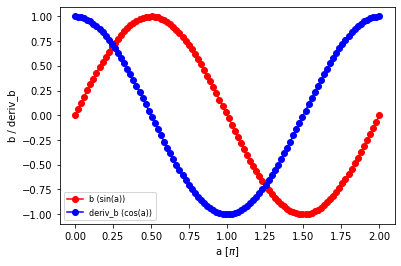

In [4]:
# note: numpy and matplotlib are already included
# create list of evenly spaced numbers
a = np.linspace(0.0, 2.0*np.pi, 100)

# save the spacing in the variable 'h'; since the numbers in 'a' are evenly spaced it doesn't matter which difference we use
h = a[10] - a[9]

# create array with the sine of that numbers
b = np.sin(a)

# calculate the derivatives of the points in 'b' using the spacing 'h' and store the results in the variable 'deriv_b'
deriv_b = np.gradient(b, h)

# plot the array 'b' and its derivative 'deriv_b'
plt.plot(a/np.pi, b,       marker = 'o', color = 'red',  label = 'b (sin(a))')
plt.plot(a/np.pi, deriv_b, marker = 'o', color = 'blue', label = 'deriv_b (cos(a))')
plt.xlabel(r'a [$\pi$]')
plt.ylabel('b / deriv_b')
plt.legend(loc = 'lower left', fontsize = 8)
plt.show()

# Note: As expected, 'b' shows the sine function and its derivative 'deriv_b' is the cosine!

### Short exercise
The purpose of this exercise is to give you a feeling of how numerical derivatives are calculated with Python.
1. Calculate the derivative of the function $f(x) = x^4 - 4x^2 + 3x - 1$ at the point $x = 1.5$ both analytically (by hand + using your calculator) and numerically (using $h/dx = 0.1$ and $h/dx = 0.01$). Compare the results. What do you expect to change when using different values for $dx$?
2. Calculate the derivative of the function $g(x) = 1/x$ at the point $x = 0.1$ both analytically (by hand + using your calculator) and numerically (using $h/dx = 0.1$). What happens?

In [5]:
# solution to task 1

# The analytical derivative is f'(x) = 4x**3 - 8x + 3 with f'(1.5) = 4.5.

# define the function of which the derivative should be taken
def f(x):

    return x**4 - 4.0*x**2 + 3.0*x - 1.0

# calculate the derivative, store the result of the calculation in the variable 'result' and print it
result_1 = derivative(f, 1.5, dx = 0.1)
result_2 = derivative(f, 1.5, dx = 0.01)
print('result_1 = ',result_1, 'result_2 = ', result_2)

result_1 =  4.560000000000001 result_2 =  4.500600000000032


In [ ]:
# solution to task 2

# The analytical derivative is g'(x) = -1/x**2 with g'(0.1) = -100.

# define the function of which the derivative should be taken
def g(x):

    return 1/x

# calculate the derivative, store the result of the calculation in the variable 'result' and print it
result = derivative(g, 0.1, dx = 0.1)
print(result)

# With the spacing chosen, the output will be an error message. This is because we try to take the value g(0)!

### Physics exercise
Let's consider a binary system of two compact objects, such as neutron stars or black holes. We assume them to be point-like and their orbit to be circular. The objects have the masses $m_1$ and $m_2$.

A certain combination of the objects' masses is the so-called chirp mass.

$$ M_{chirp} = \frac{(m_1 m_2)^{3/5}}{(m_1 + m_2)^{1/5}} $$

Over time, the binary system emits gravitational waves and therefore looses energy, which results in the objects to inspiral and finally merge. The frequency of the gravitational waves increases over time. It is given by the formula

$$ f_{GW} = \frac{1}{\pi} \left( \frac{5}{256 \tau} \right)^{3/8} \left( \frac{G M_{chirp}}{c^3} \right)^{-5/8}, $$

where $\tau$ is the time to coalescence, $G$ the gravitational constant and $c$ the speed of light.

## Numerical integration
### Mathematical background
As it was the case for differentiation, sometimes, analytic solutions to integrals do not exist or the exact function is unknown (only data points are given). Then, numerical integration comes into play. Different methods exist to calculate the area underneath a function/set of data points numerically. Some of them will be discussed in the following. For a descriptive explanation, check [this video](https://www.youtube.com/watch?v=WxGIgWOiVx8) (you can skip the part on multiple integrals) and the PDF slides of topic 6 on [this webpage](https://empossible.net/academics/emp4301_5301/) (topic 6 also includes material on finite difference methods and numerical differentiation).

The problem setup is always to calculate the integral $\int_a^b f(x) \, dx$, i.e. the area underneath the curve of the function $f(x)$ from point $a$ to point $b$.

#### Riemann sum
The Riemann sum divides the interval $[a,b]$ of the finite integral into descrete steps. The area that needs to be calculated is then approximated by rectangles, all of them having the same width $\Delta x$. This breaks down the integral into a sum,

$$ \int_a^b f(x) \, dx \approx \sum_{i=1}^N f(x_i) \Delta x = \Delta x \sum_{i=1}^N f(x_i), $$

where $f(x_i)$ is the function/data point value at the point $x_i$.

There are three possibilities for choosing the points $x_i$, one can either always use the ones on the left hand-sides of the rectangles, the middle points or the ones on the right hand-sides of the rectangles, as shown below. Depending on which of those is chosen, the position of $x_1$ and $x_N$ with regard to $a$ and $b$ changes.
1. left-hand Riemann sum: $a = x_1$, $b$ is not included, $x_N$ is therefore $\Delta x$ left of $b$
2. centered Riemann sum: $a$ and $b$ are not included, $x_1$ is $\Delta x/2$ right of $a$ and $x_N$ is $\Delta x/2$ left of $b$
3. right-hand Riemann sum: $a$ is not included, $x_1$ is therefore $\Delta x$ right of $a$, $b = x_N$

All the possibilities listed above have similar errors coming from the gaps between the true curve and the rectangles. The accuracy can be improved by reducing $\Delta x$ or by employing a different numerical integration method.

<img src="./Pictures/Riemann_sum.png" width="300" height="500">

source: https://empossible.net/wp-content/uploads/2020/09/Lecture-Introduction-and-Discrete-Integration.pdf

#### Trapezoidal approximation
Using trapezoids instead of rectangles approximates the area underneath the curve $f(x)$ a bit better. Notice that in this case, both $a$ and $b$ are needed. They are set to $a = x_1$ and $b = x_{N+1}$, the remaining points $x_i$ are distributed evenly between starting and end point.

The area of one trapezoid is given by

$$ A = A_{triangle} + A_{rectangle} = \frac{1}{2} (x_{i+1} - x_i) (f_{i+1} - f_i) + (x_{i+1} - x_i) f_i = \Delta x \, \frac{f_i + f_{i+1}}{2}. $$

The integral is then approximated by

$$ \int_a^b f(x) \, dx \approx \frac{\Delta x}{2} \sum_{i=1}^N f_i + f_{i+1}. $$

Notice that the first trapezoid has its left border at $a = x_1$, whereas the left border of the last trapezoid is at $x_N$, which is not equal to $b$. Nonetheless, the point $b = x_{N+1}$ is needed for calculating its area.

<img src="./Pictures/Trapezoidal_approximation.png" width="300" height="500">

source: https://empossible.net/wp-content/uploads/2020/09/Lecture-Trapezoidal-Integration.pdf

#### Simpson's rule
Simpson's rule uses three or more adjacent points for calculating the desired integral. Instead of fitting rectangles or trapezoids underneath the curve of $f(x)$ to approximate the area, we now fit rectangles with a polynomial-like head.

Using three adjacent points, the first step is to fit them to a polynomial of the form $f(x) = a_0 + a_1 x + a_2 x^2$. The points are given as $(-\Delta x, f_1)$, $(0, f_2)$ and $(\Delta x, f_3)$, where the x-axis was chosen to be at the position of the midpoint (it can be chosen freely). Substituting them into the polynomial leads to the following three equations.

\begin{align}
    f_1 &= a_0 - a_1 \Delta x + a_2 \Delta x^2 \\
    f_2 &= a_0 \\
    f_3 &= a_0 + a_1 \Delta x + a_2 \Delta x^2
\end{align}

Solving the equations above for the coefficients of the polynomial, $a_i$, leads to

\begin{align}
    a_0 &= f_2, \\
    a_1 &= \frac{f_3 - f_1}{2 \Delta x}, \\
    a_2 &= \frac{f_1 - 2 f_2 + f_3}{2 \Delta x^2}.
\end{align}

The polynomial can now be integrated from $- \Delta x$ to $\Delta x$.

\begin{align}
    \int_{- \Delta x}^{\Delta x} f(x) \, dx &= \int_{- \Delta x}^{\Delta x} a_0 + a_1 x + a_2 x^2 \, dx = \left[ a_0 x + \frac{1}{2} a_1 x^2 + \frac{1}{3} a_2 x^3 \right]_{- \Delta x}^{\Delta x} = 2 a_0 \Delta x + \frac{2}{3} a_2 \Delta x^3 \\
    &= 2 f_2 \Delta x + \frac{2}{3} \frac{f_1 - 2 f_2 + f_3}{2 \Delta x^2} \Delta x^3 = 2 f_2 \Delta x + \frac{1}{3} (f_1 - 2 f_2 + f_3) \Delta x = \frac{1}{3} \Delta x (f_1 + 4 f_2 + f_3)
\end{align}

Repeating this procedure and adding up all integrals gives us the approximation of our originally desired integral. The general fomula is given by

$$ \int_a^b f(x) \, dx \approx \frac{\Delta x}{3} \sum_{i=1}^N f_i + 4 f_{i+1} + f_{i+2}. $$

Notice that the first sub-area has its left border at $a = x_1$, whereas the left border of the last sub-area is at $x_N$, which is not equal to $b$. Nonetheless, the point $b = x_{N+2}$ is needed for calculating its area.

<img src="./Pictures/Simpsons_rule.png" width="500" height="700">

source: https://www.youtube.com/watch?v=WxGIgWOiVx8

### Example usage in SciPy
In SciPy included is the sub-package [scipy.integrate](https://docs.scipy.org/doc/scipy/reference/tutorial/integrate.html) that directly computes the finite integral of a given function/set of data points. Several different integration methods are available. Additionally, ordinary differential equations can be solved.

In the case an analytic expression for the integrand is given, we can use the function [scipy.integrate.quad](https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.quad.html). Its syntax is the following

$$ quad(f, a, b), $$

where $f$ is the analytic expression we would like to integrate and $a$ and $b$ are the lower and upper bound, respectively. Those can take values of positive and negative infinity.

The returned output consists of two values, the first one being the solution to the integral and the second one being an upper bound on the error.

In [7]:
# include the sub-package for integration from SciPy
import scipy.integrate as integrate

# define the function of which the integral should be taken
def integrand_1(x):

    return np.sin(x)

# calculate the integral, store the result of the calculation in the variable 'result' and print it
result = integrate.quad(integrand_1, 0.0, np.pi)
print(result)

# We know that the analytical result of this calculation is 2!

(2.0, 2.220446049250313e-14)


If only a set of data points is given, we can either use [scipy.integrate.trapezoid](https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.trapezoid.html) or [scipy.integrate.simpson](https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.simpson.html) to calculate the desired area. The syntax of the two functions is similar.

$$ trapezoid/simpson(y, x = None, dx = 1.0) $$

The first parameter $y$ is an input array that should be integrated. $x$ is an array containing the sample points corresponding to the $y$ values. If $x$ is 'None', the sample points are assumed to be evenly spaced $dx$ apart. The default value is 'None'. The spacing between the sample is given by $dx$ when $x$ is 'None'. The default value is $1.0$.


In [9]:
# create an array with data points of the sine function
a = np.linspace(0.0, np.pi, 5)
b = np.sin(a)

# calculate the integral using the trapezoidal approximation, store the result of the calculation in the variable 'result_1'
result_1 = integrate.trapezoid(b, a)

# calculate the integral using Simpson's rule, store the result of the calculation in the variable 'result_2'
result_2 = integrate.simpson(b, a)

# print both results
print('result_1 = ', result_1, 'result_2 = ', result_2)

# We know that the analytical result of this calculation is 2!

result_1 =  1.8961188979370398 result_2 =  2.0045597549844207


### Short exercise
The purpose of this exercise is to give you a feeling of how integrals are calculated numerically with Python.

Repeat the calculations above using the cosine function. Compare your results for the integral $\int_{0}^{\pi} cos(x) \, dx$ for the three different functions scipy.integrate.quad, scipy.integrate.trapezoid and scipy.integrate.simpson (use only three data points for the last two functions).

In [11]:
# solution part 1
# define the function of which the integral should be taken
def integrand_2(x):

    return np.cos(x)

# calculate the integral, store the result of the calculation in the variable 'result_1'
result_1 = integrate.quad(integrand_2, 0.0, np.pi)


# solution part 2
# create an array with data points of the cosine function
a = np.linspace(0.0, np.pi, 3)
b = np.cos(a)

# calculate the integral using the trapezoidal approximation, store the result of the calculation in the variable 'result_2'
result_2 = integrate.trapezoid(b, a)

# calculate the integral using Simpson's rule, store the result of the calculation in the variable 'result_3'
result_3 = integrate.simpson(b, a)


# print all results in comparison
print('Result from scipy.integrate.quad:      ', result_1)
print('Result from scipy.integrate.trapezoid: ', result_2)
print('Result from scipy.integrate.simpson:   ', result_3)


# We know that the analytical result of this calculation is 0!

Result from scipy.integrate.quad:       (4.9225526349740854e-17, 2.2102239425853306e-14)
Result from scipy.integrate.trapezoid:  1.1102230246251565e-16
Result from scipy.integrate.simpson:    1.1626228326695438e-16


### Physics exercise